<a href="https://colab.research.google.com/github/Dih08/projetos-simples-e-aleatorios/blob/main/RedeNeuralRecorrente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN e Deep RNN

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras import layers

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv')

In [29]:
data = data.rename(columns = {'Monthly milk production (pounds per cow)' : 'milk'})

In [30]:
data.head(6)

,Month,milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
5,1962-06,697


In [23]:
import numpy as np

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # Determina o índice final da subsequência
        end_ix = i + n_steps
        # Se o índice final ultrapassar o comprimento da sequência, interrompe o loop
        if end_ix > len(sequence) - 1:
            break
        # Cria as subsequências de entrada (X) e saída (y)
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [31]:
n_steps = 15
X, y = split_sequence(list(data['milk']), n_steps)

In [32]:
#defindo os modelos
n_features = 1
model = Sequential()
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
X.shape

(153, 15)

In [34]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

X_train = X[1:100,:,:]
X_test = X[101:X.shape[0],:,:]
y_train = y[1:100]
y_test = y[101:X.shape[0]]

In [35]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(153, 15, 1)
(99, 15, 1)
(52, 15, 1)
(99,)
(52,)


In [36]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 836419.1875
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 650860.8125 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 488954.3438 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 323089.0000 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 182339.8125
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50259.4375  
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11234.6650
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 39756.7422 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10991.6631 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5919.9014 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12082.2197 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9657.3428 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5207.9941 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3758.7451 
Epoch 15/500
4/4 ━━━━━━━━━━━

In [37]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


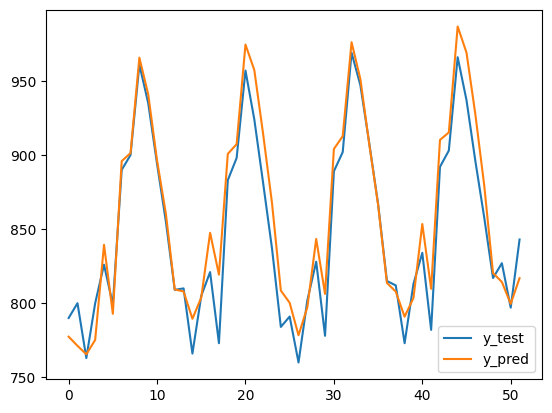

In [38]:
plt.plot(y_test, label = 'y_test')
plt.plot(y_pred, label = 'y_pred')
plt.legend()

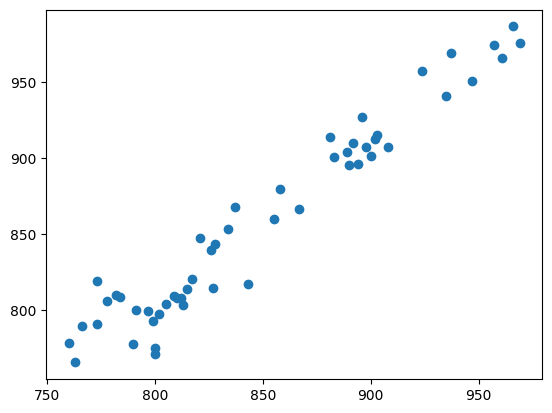

In [39]:
plt.scatter(y_test, y_pred)

In [48]:
data.tail()

,Month,milk
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [49]:
X_new = data['milk'][-n_steps:]

In [51]:
X_new

array([[[812],
        [773],
        [813],
        [834],
        [782],
        [892],
        [903],
        [966],
        [937],
        [896],
        [858],
        [817],
        [827],
        [797],
        [843]]])

In [50]:
X_new = np.array(X_new).reshape(1, n_steps, 1)

In [44]:
#adicionando mais camadas

n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 390544.9688
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 293406.6250
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 205575.9062
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 78133.1016
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 31442.5723
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7414.3438
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13573.5596
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9483.2969
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 27938.5137
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8468.2988
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13226.4150
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7938.7251
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6166.9302
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4070.2158
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━

In [42]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step


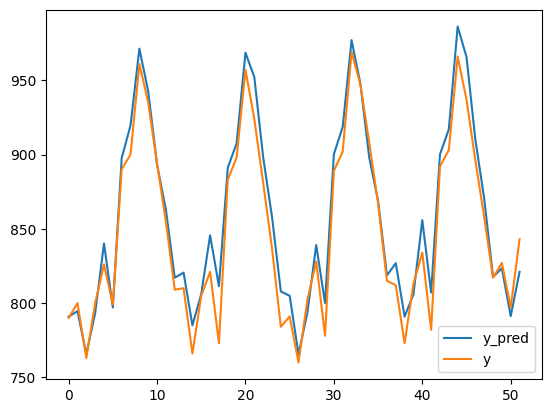

In [46]:
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y')
plt.legend()

In [52]:
model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step


array([[837.8505]], dtype=float32)

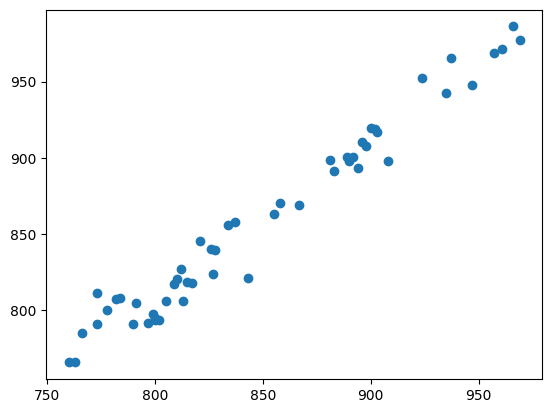

In [53]:
plt.scatter(y_test, y_pred)